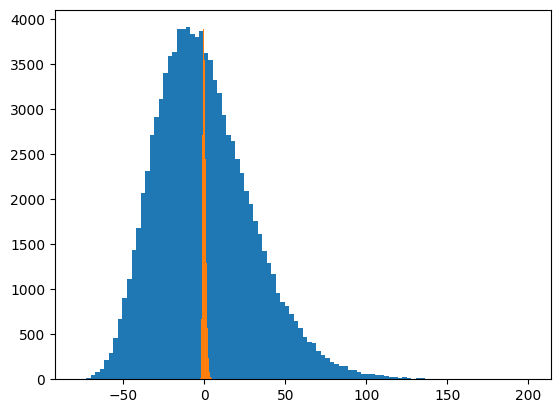

In [67]:
import numpy as np

T = 10
n = int(1e5)
data = np.random.exponential(scale=10, size=(n, T))
scores = np.zeros(data.shape)
scores[:, -1] = data[:, -1]
for i in range(T-2, -1, -1): scores[:, i] = data[:, i] + scores[:, i+1]
rloo_scores = scores - np.sum(scores, axis=0, keepdims=True) / (n-1) + scores / (n-1)
normalized_rloo = rloo_scores / np.std(rloo_scores, axis=0)
plt.hist(rloo_scores[:, 1], bins=100)
plt.hist(normalized_rloo[:, 1], bins=100)
plt.show()

RLOO obviously has different magnitudes for different t.


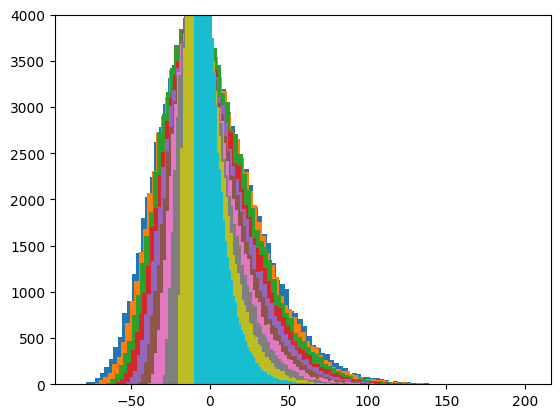

In [68]:
print("RLOO obviously has different magnitudes for different t.")
for i in range(T):
    plt.hist(rloo_scores[:, i], bins=100)
plt.ylim((0, 4e3))
plt.show()

To avoid magnitude problems we can normalize with respect to variance at t=0.


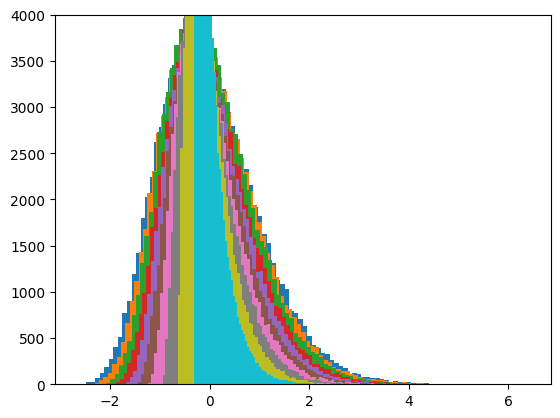

In [69]:
print("To avoid magnitude problems we can normalize with respect to variance at t=0.")
better_norm_rloo = rloo_scores / np.std(rloo_scores[:, 0], axis=0)
for i in range(T):
    plt.hist(better_norm_rloo[:, i], bins=100)
plt.ylim((0, 4e3))
plt.show()


Advantage Alignment Scores have the form
\begin{align}
A^*(s_t, a_t, b_t) =
\left(
A^1(s_t, a_t, b_t) + \beta \gamma \cdot 
\left( \sum_{k < t} \gamma^{t-k} A^1(s_k, a_k, b_k) \right) 
A^2(s_t, a_t, b_t)
\right)
\end{align}